In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
heart_df = pd.read_csv(r'C:\Users\khush\Downloads\heart.csv')

In [9]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [15]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: xlabel='Age', ylabel='count'>

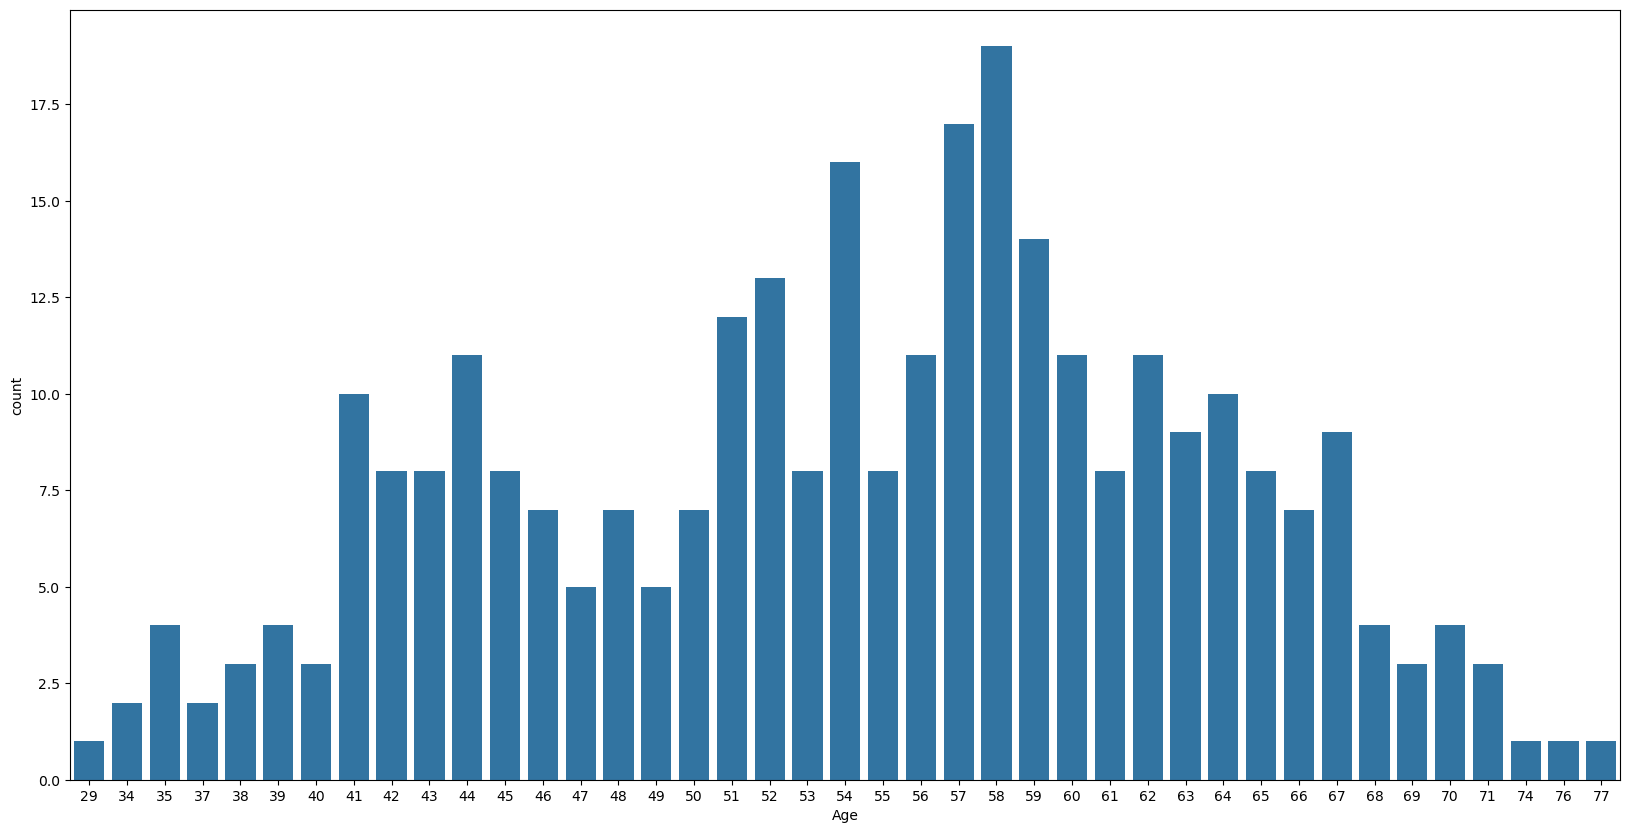

In [17]:
plt.figure(figsize=(20, 10))
plt.xlabel("Age")
sns.countplot(x=heart_df['age'])

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

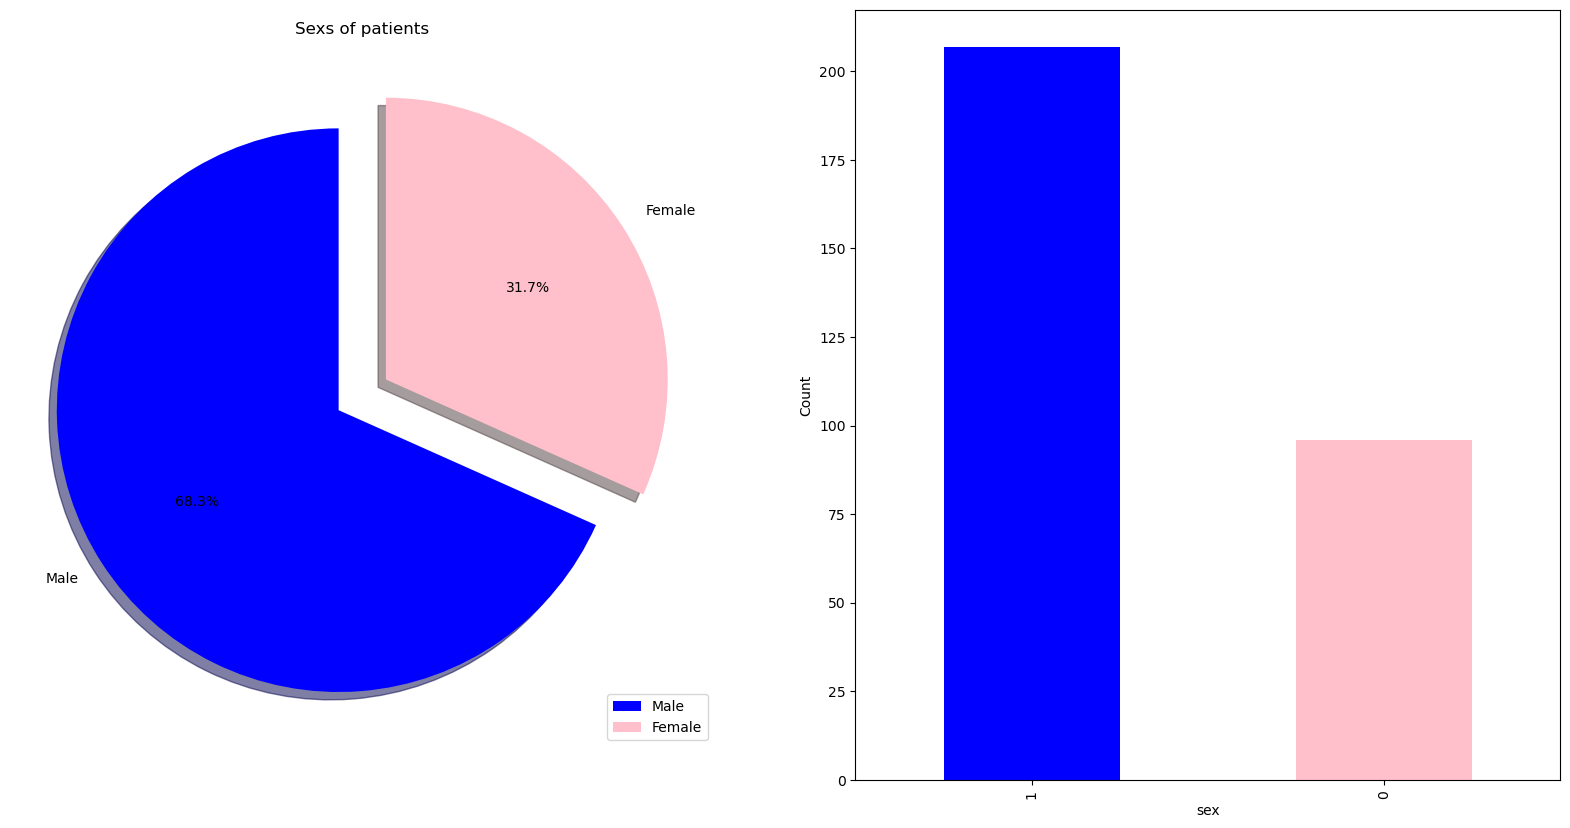

In [19]:
# Sex distribution
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sex_labels = ['Male', 'Female']
sex_explode = (.1, .1)
plt.pie(heart_df['sex'].value_counts(), labels=sex_labels, startangle=90, shadow=True, explode=sex_explode,
       autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Sexs of patients')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
heart_df['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.ylabel('Count')
plt.xticks()

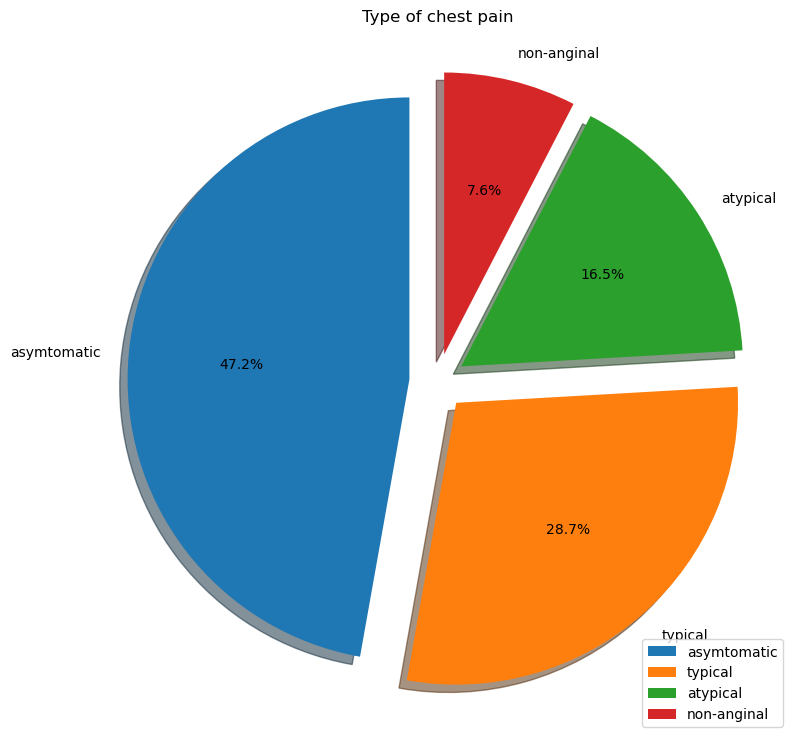

In [21]:
# Chest pain distribution
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
cp_labels = ['asymtomatic', 'typical', 'atypical', 'non-anginal']
cp_explode = (.1, .1, .1, .1)
plt.pie(heart_df['cp'].value_counts(), labels=cp_labels, startangle=90, shadow=True, explode=cp_explode,
       autopct='%1.1f%%')
plt.title('Type of chest pain')
plt.legend(loc='lower right')


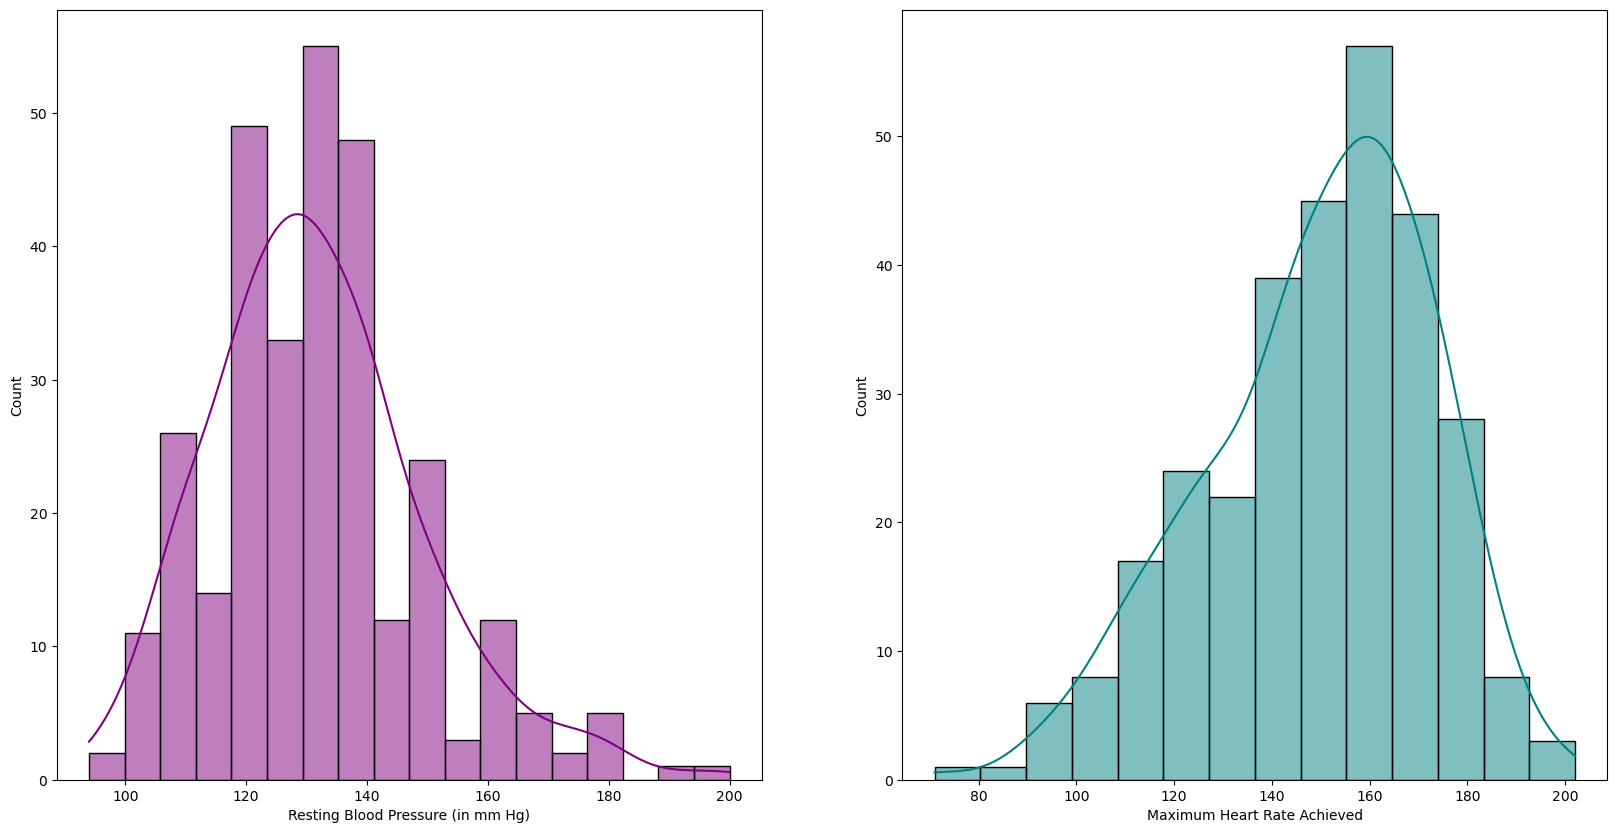

In [23]:
# Blood pressure
plt.figure(figsize=(20, 10))

# Subplot 1: Resting blood pressure
plt.subplot(1, 2, 1)
sns.histplot(heart_df['trtbps'], color='purple', kde=True)
plt.xlabel('Resting Blood Pressure (in mm Hg)')

# Subplot 2: Maximum heart rate
plt.subplot(1, 2, 2)
sns.histplot(heart_df['thalachh'], color='teal', kde=True)
plt.xlabel('Maximum Heart Rate Achieved')

plt.show()

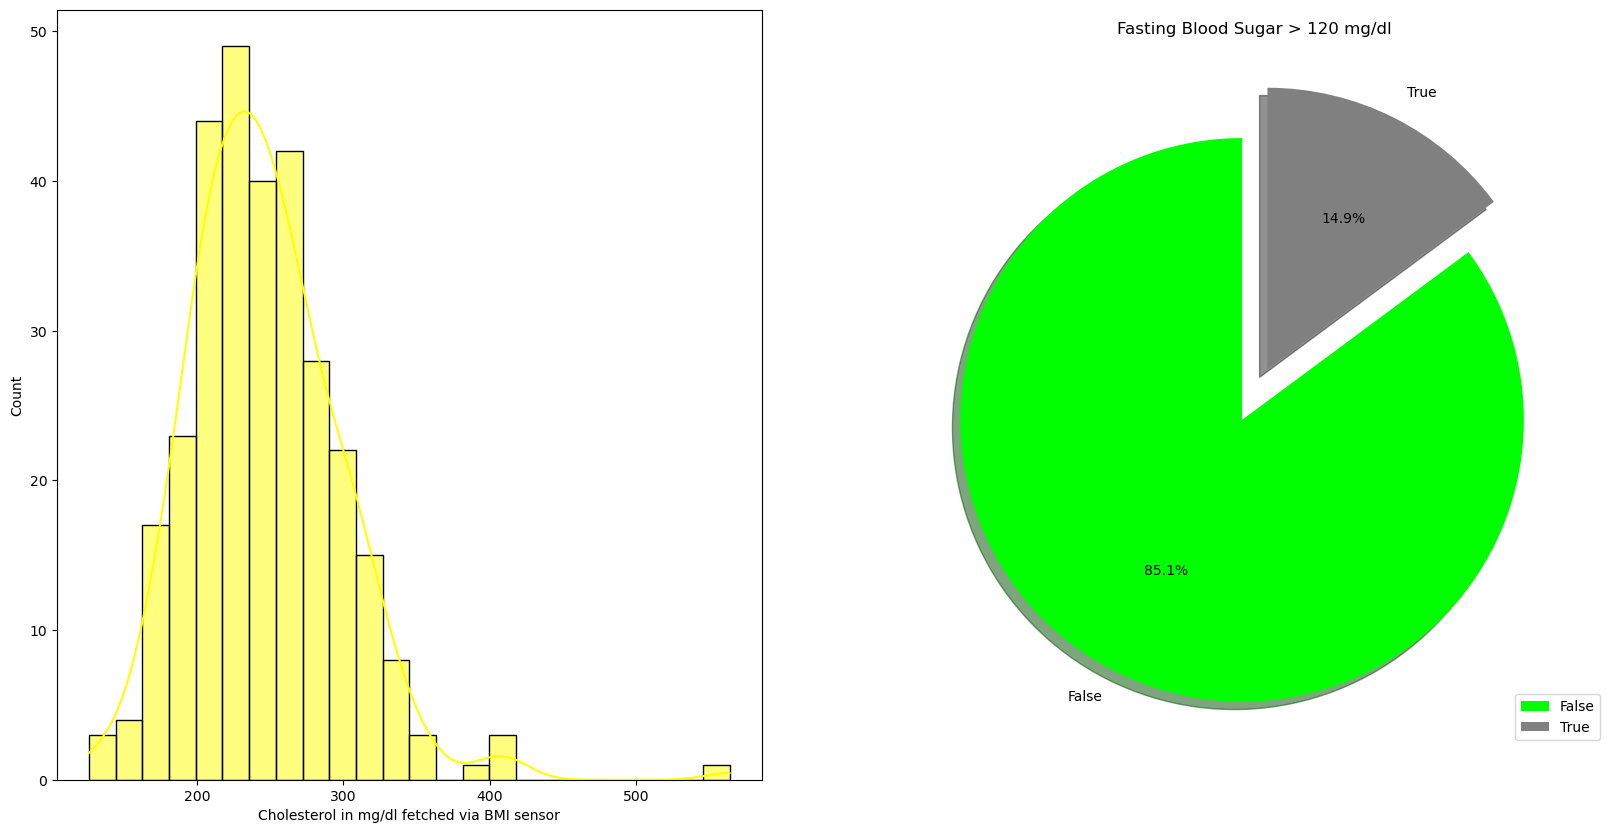

In [25]:
# Cholesterol
plt.figure(figsize=(20, 10))

# Subplot 1: Cholesterol
plt.subplot(1, 2, 1)
sns.histplot(heart_df['chol'], color='yellow', kde=True)
plt.xlabel('Cholesterol in mg/dl fetched via BMI sensor')

# Subplot 2: Fasting blood sugar
plt.subplot(1, 2, 2)
fbs_labels = ['False', 'True']
fbs_explode = (0.1, 0.1)
plt.pie(heart_df['fbs'].value_counts(), labels=fbs_labels, startangle=90, shadow=True,
        explode=fbs_explode, autopct='%1.1f%%', colors=['lime', 'grey'])
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.legend(loc='lower right')

plt.show()

In [29]:
# Get the value counts for the 'restecg' column and reset the index
ecg_data = heart_df['restecg'].value_counts().reset_index()

# Rename the index values based on ECG results
ecg_data.loc[1, 'index'] = 'normal'
ecg_data.loc[2, 'index'] = 'having ST-T'
ecg_data.loc[0, 'index'] = 'hypertrophy'

print(ecg_data)

   restecg  count        index
0        1    152  hypertrophy
1        0    147       normal
2        2      4  having ST-T


([0, 1, 2],
 [Text(0, 0, 'hypertrophy'), Text(1, 0, 'normal'), Text(2, 0, 'having ST-T')])

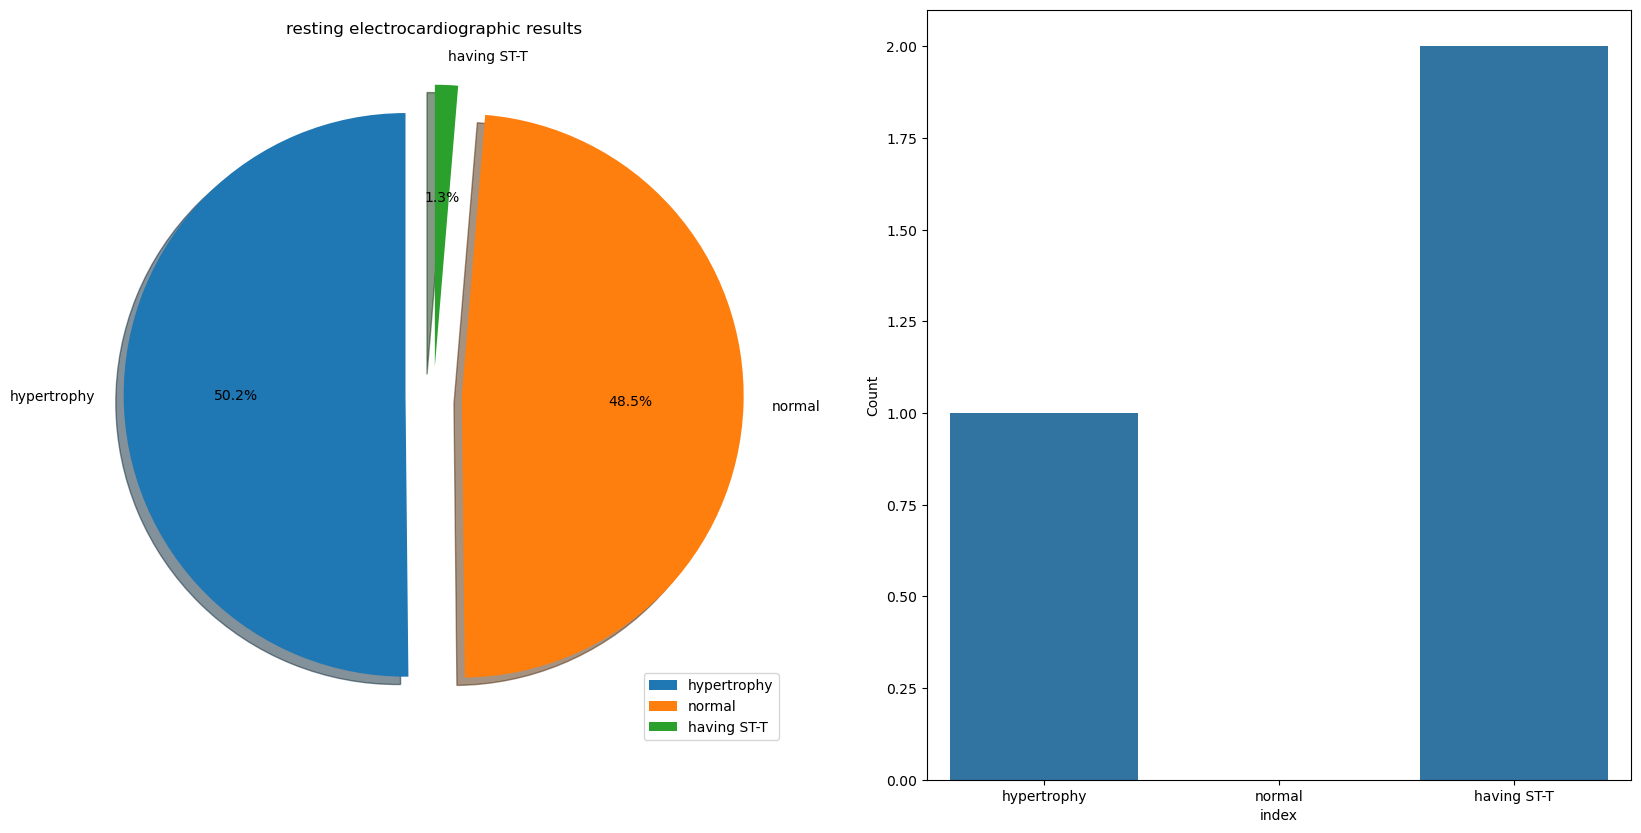

In [31]:
# resting electrocardiographic
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
ecg_labels = ['hypertrophy', 'normal', 'having ST-T']
ecg_explode = (.1, .1, .1)
plt.pie(heart_df['restecg'].value_counts(), labels=ecg_labels, startangle=90, shadow=True, explode=ecg_explode,
       autopct='%1.1f%%')
plt.title('resting electrocardiographic results')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
sns.barplot(x=ecg_data['index'], y=ecg_data['restecg'])
plt.ylabel('Count')
plt.xticks()

<Axes: >

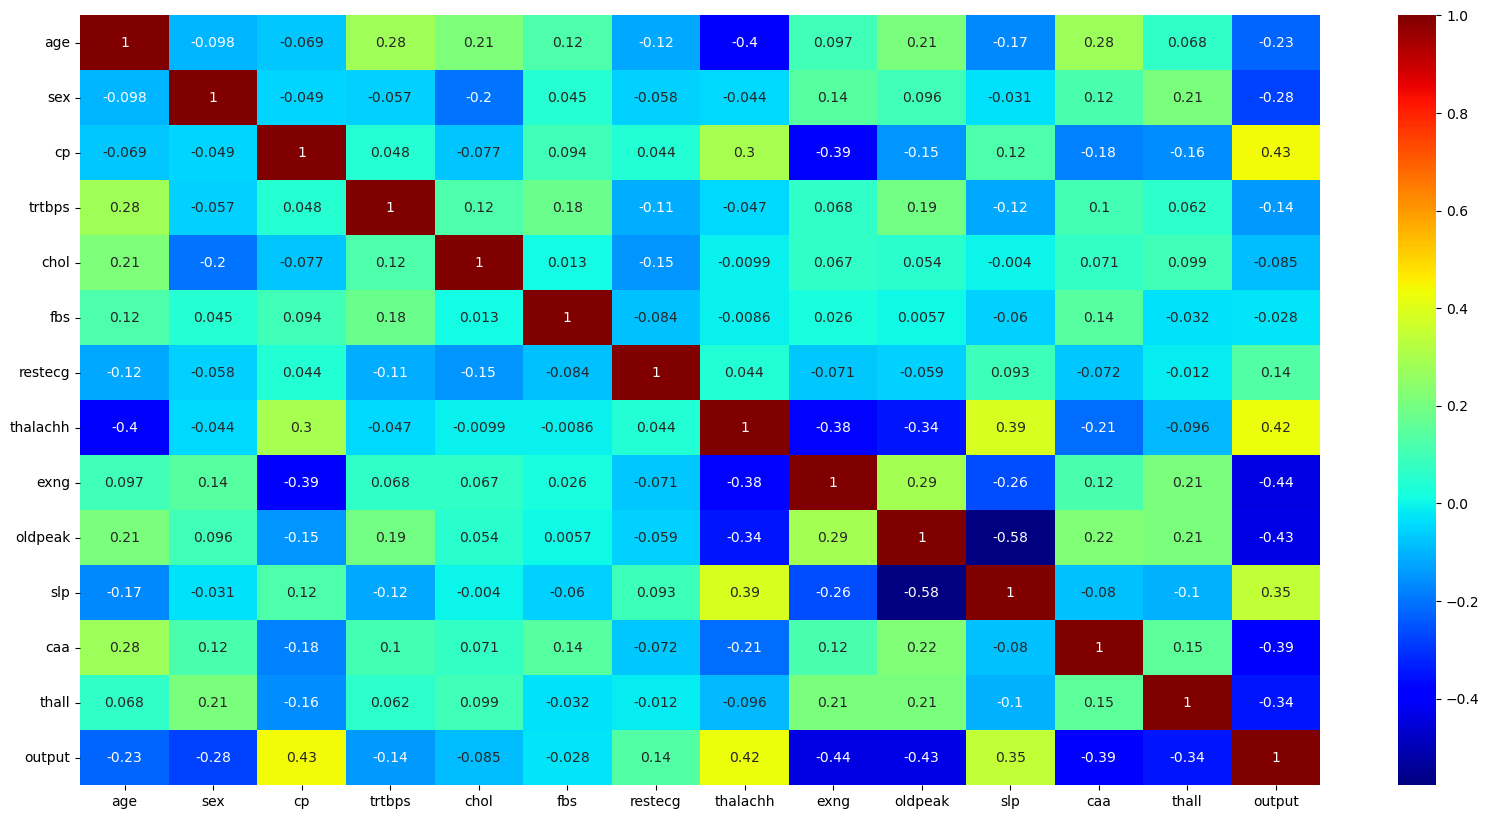

In [33]:
# Heatmap correlation
plt.figure(figsize=(20, 10))
sns.heatmap(heart_df.corr(), annot=True, cmap='jet')


<Figure size 2000x1000 with 0 Axes>

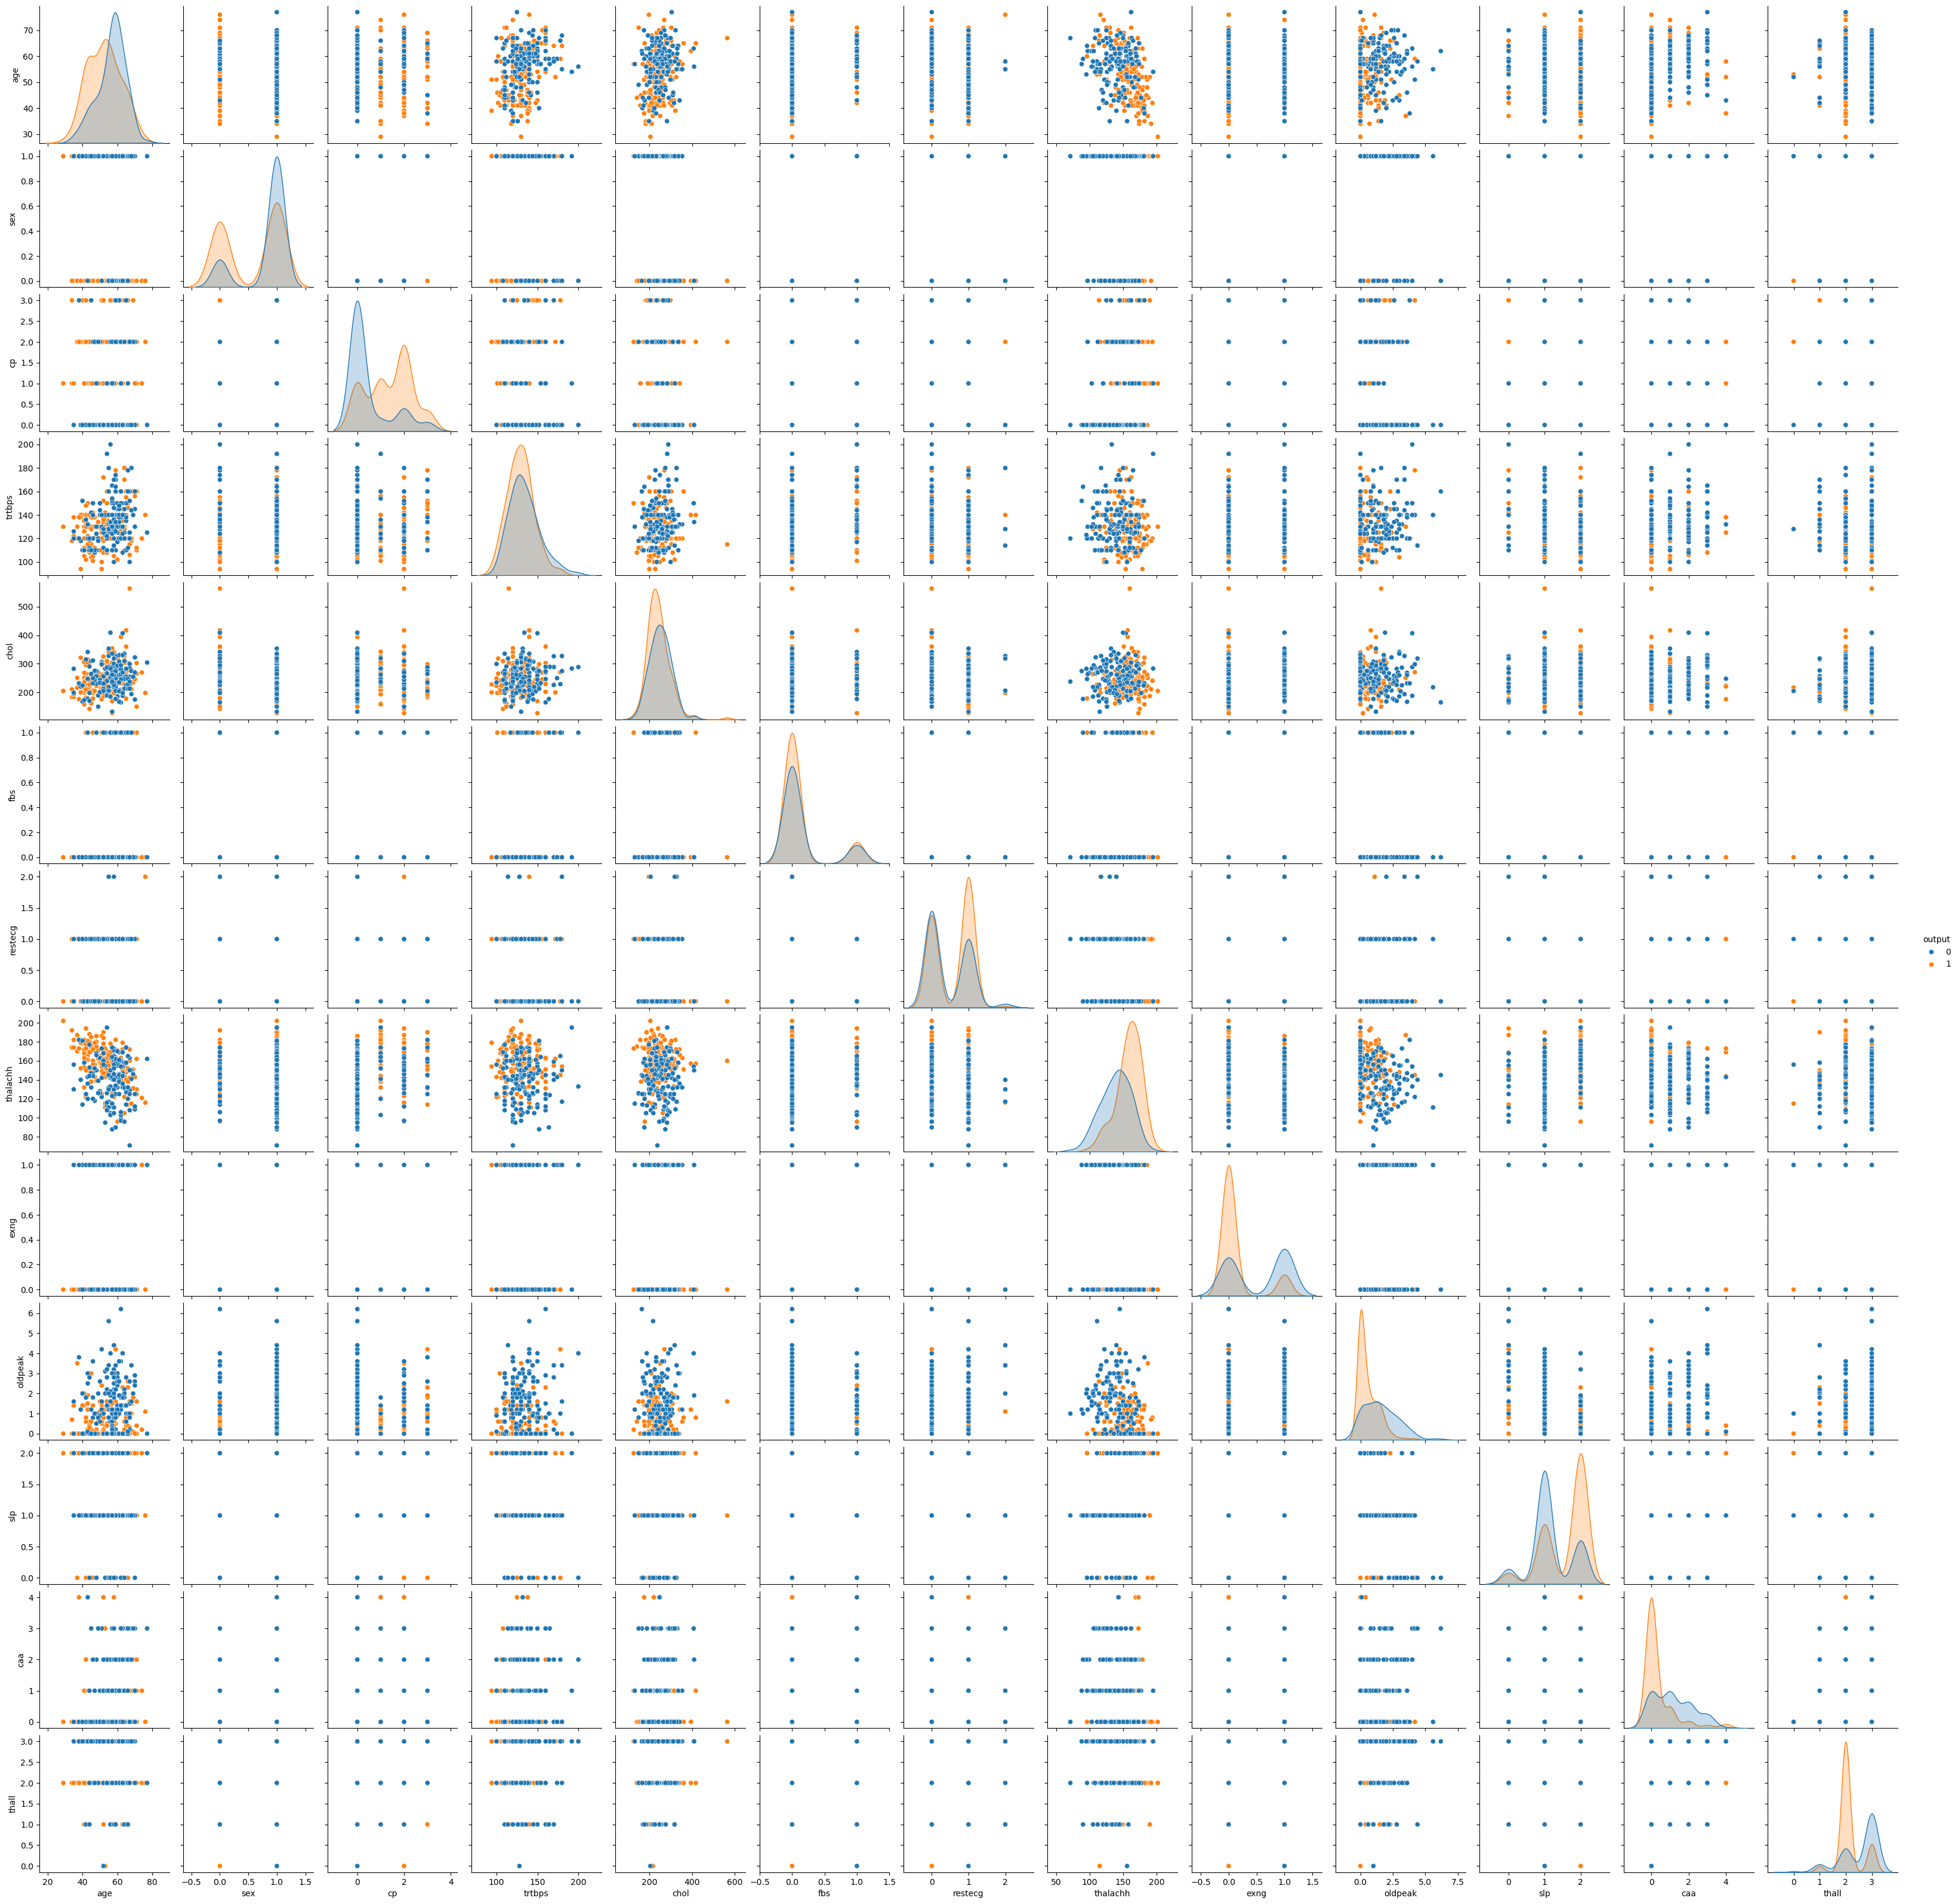

In [35]:
# Pairplot
plt.figure(figsize=(20, 10))
sns.pairplot(heart_df, hue='output')

In [39]:
import plotly.figure_factory as ff

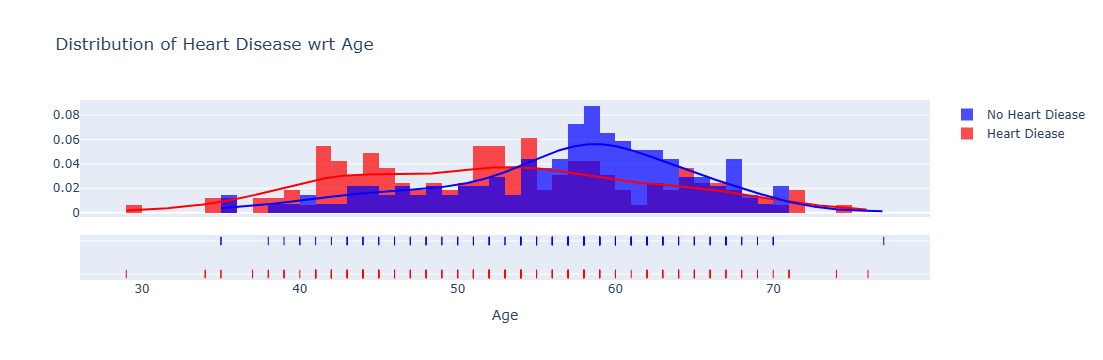

In [44]:
ff_age = ff.create_distplot([heart_df[heart_df.output==1].age, heart_df[heart_df.output==0].age],
                           ['Heart Diease', 'No Heart Diease'], colors=['red', 'blue'])
ff_age.update_layout(title='Distribution of Heart Disease wrt Age', xaxis_title='Age')
ff_age.show()

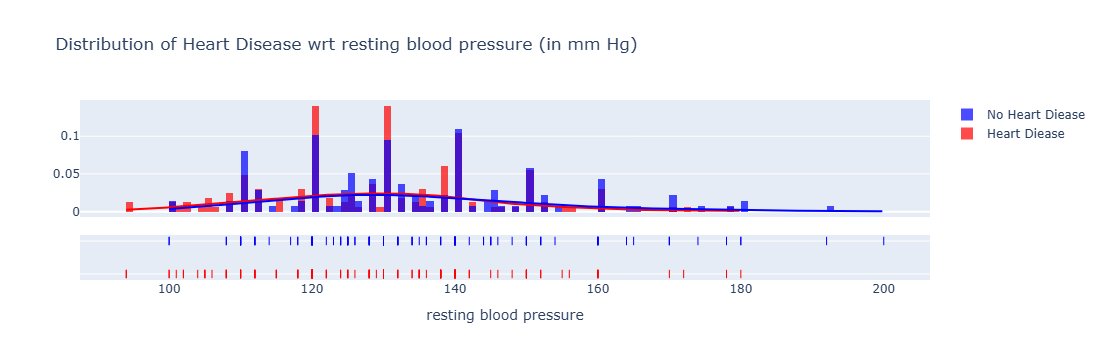

In [46]:
ff_age = ff.create_distplot([heart_df[heart_df.output==1].trtbps, heart_df[heart_df.output==0].trtbps],
                           ['Heart Diease', 'No Heart Diease'], colors=['red', 'blue'])
ff_age.update_layout(title='Distribution of Heart Disease wrt resting blood pressure (in mm Hg)', xaxis_title='resting blood pressure')
ff_age.show()

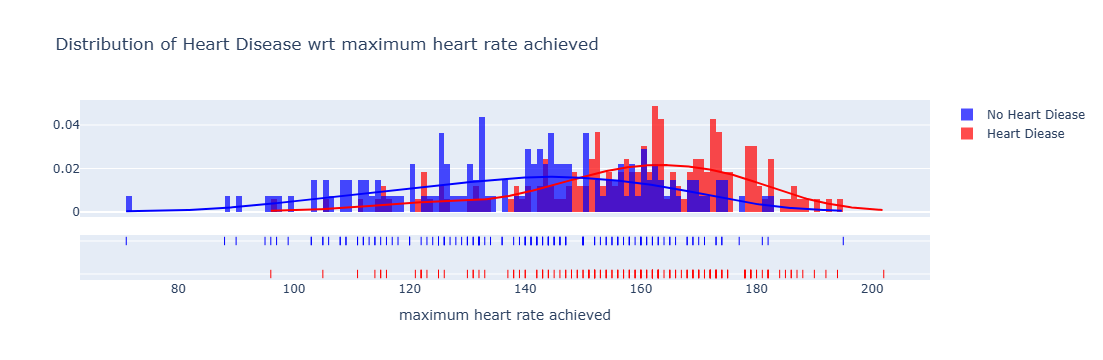

In [48]:
ff_age = ff.create_distplot([heart_df[heart_df.output==1].thalachh, heart_df[heart_df.output==0].thalachh],
                           ['Heart Diease', 'No Heart Diease'], colors=['red', 'blue'])
ff_age.update_layout(title='Distribution of Heart Disease wrt maximum heart rate achieved', xaxis_title='maximum heart rate achieved')
ff_age.show()

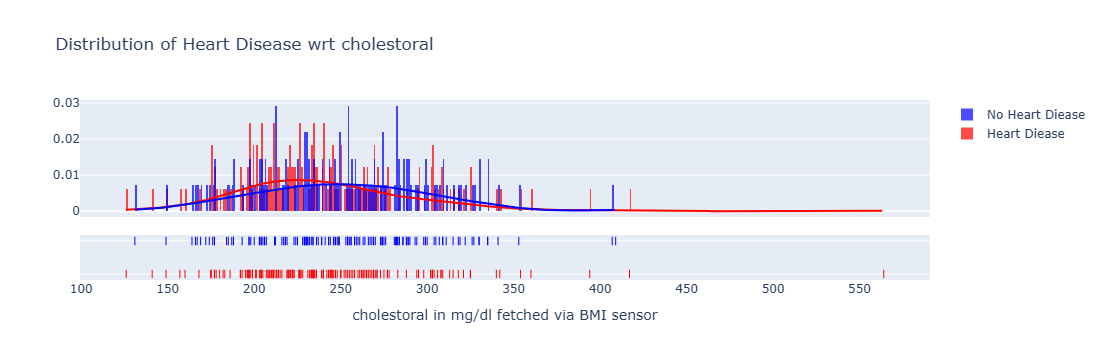

In [50]:
ff_age = ff.create_distplot([heart_df[heart_df.output==1].chol, heart_df[heart_df.output==0].chol],
                           ['Heart Diease', 'No Heart Diease'], colors=['red', 'blue'])
ff_age.update_layout(title='Distribution of Heart Disease wrt cholestoral', xaxis_title='cholestoral in mg/dl fetched via BMI sensor')
ff_age.show()

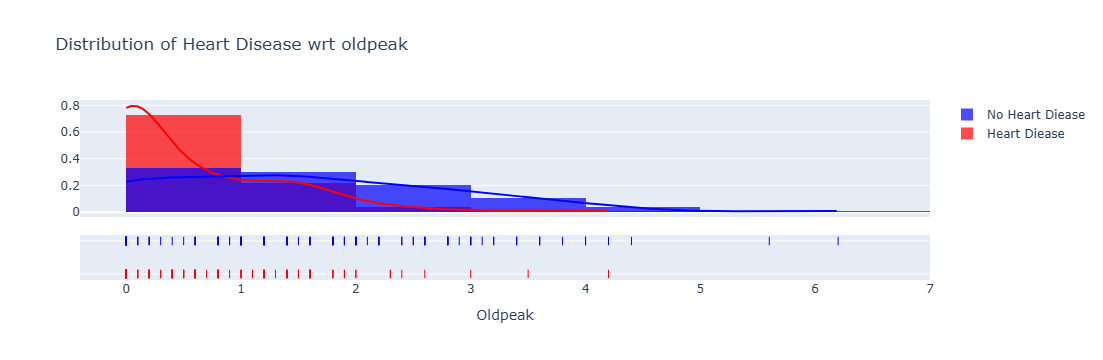

In [52]:
ff_age = ff.create_distplot([heart_df[heart_df.output==1].oldpeak, heart_df[heart_df.output==0].oldpeak],
                           ['Heart Diease', 'No Heart Diease'], colors=['red', 'blue'])
ff_age.update_layout(title='Distribution of Heart Disease wrt oldpeak', xaxis_title='Oldpeak')
ff_age.show()

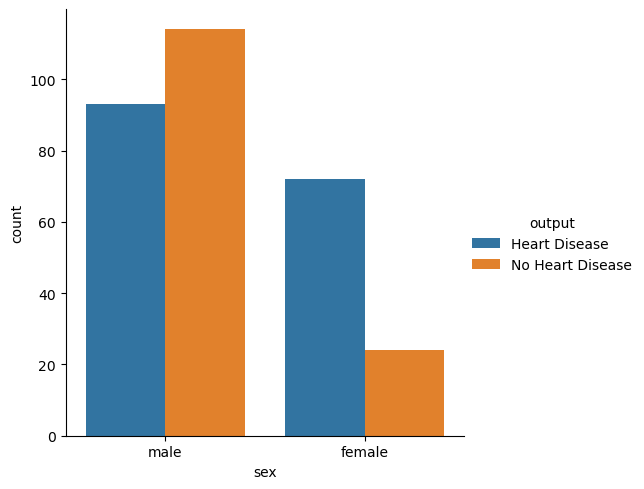

In [54]:
sex_data = heart_df[['sex', 'output']]
sex_data['sex'] = sex_data['sex'].replace([1], 'male')
sex_data['sex'] = sex_data['sex'].replace([0], 'female')
sex_data['output'] = sex_data['output'].replace([1], 'Heart Disease')
sex_data['output'] = sex_data['output'].replace([0], 'No Heart Disease')
sns.catplot(x='sex', data=sex_data, kind='count', hue='output')

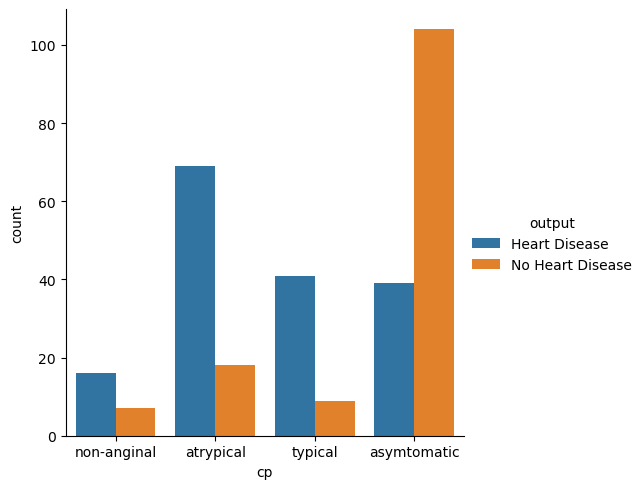

In [56]:
cp_data = heart_df[['cp', 'output']]
cp_data['cp'] = cp_data['cp'].replace([1], 'typical')
cp_data['cp'] = cp_data['cp'].replace([2], 'atrypical')
cp_data['cp'] = cp_data['cp'].replace([3], 'non-anginal')
cp_data['cp'] = cp_data['cp'].replace([0], 'asymtomatic')
cp_data['output'] = cp_data['output'].replace([1], 'Heart Disease')
cp_data['output'] = cp_data['output'].replace([0], 'No Heart Disease')
sns.catplot(x='cp', data=cp_data, kind='count', hue='output')

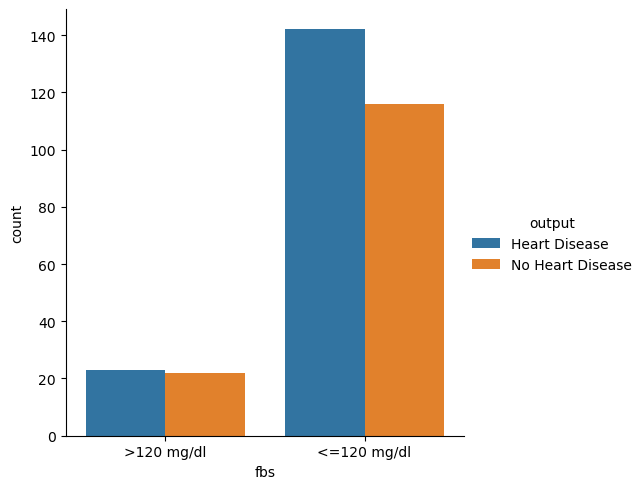

In [58]:
fbs_data = heart_df[['fbs', 'output']]
fbs_data['fbs'] = fbs_data['fbs'].replace([1], '>120 mg/dl')
fbs_data['fbs'] = fbs_data['fbs'].replace([0], '<=120 mg/dl')
fbs_data['output'] = fbs_data['output'].replace([1], 'Heart Disease')
fbs_data['output'] = fbs_data['output'].replace([0], 'No Heart Disease')
sns.catplot(x='fbs', data=fbs_data, kind='count', hue='output')

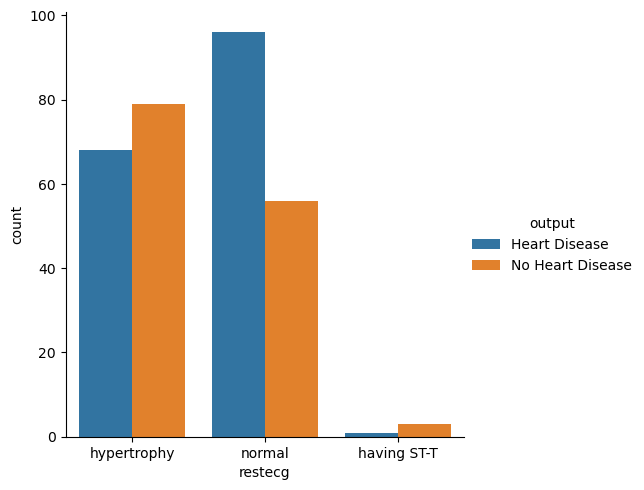

In [60]:
ecg_data = heart_df[['restecg', 'output']]
ecg_data['restecg'] = ecg_data['restecg'].replace([1], 'normal')
ecg_data['restecg'] = ecg_data['restecg'].replace([2], 'having ST-T')
ecg_data['restecg'] = ecg_data['restecg'].replace([0], 'hypertrophy')
ecg_data['output'] = ecg_data['output'].replace([1], 'Heart Disease')
ecg_data['output'] = ecg_data['output'].replace([0], 'No Heart Disease')
sns.catplot(x='restecg', data=ecg_data, kind='count', hue='output')